In [1]:
%matplotlib inline

## [Hierarchical (Agglomerative) Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
- Builds nested clusters by iteratively merging or splitting sub-structures. The hierarchy is modeled with a tree or dendrogram.
- Agglomerative Clustering works from the bottom up using a choice of linkage criteria:
    - **Ward**: minimizes the sum of squared differences within clusters. This is a variance-minimizing approach.
    - **Max/Complete linkage**: minimizes the max distance between pairs of clusters.
    - **Average linkage**: minimizes the avg distances between all pairs of clusters.
    - **Single linkage**: minimizes the distance between the closest observations of pairs of clusters.
- AC can scale to large number of samples when used with a connectivity matrix, but it is computationally expensive when no connectivity constraints are used.

## Example: AC on 2D embedding of digits
- The goal is to show how metrics behave, not to find good digit clusters.

In [2]:
from time       import time
import numpy as np
from scipy      import ndimage
from matplotlib import pyplot as plt
from sklearn    import manifold, datasets

X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

np.random.seed(0)

In [3]:
# Having a larger dataset shows more clearly the behavior of the
# methods, but we multiply the size of the dataset only by 2, as the
# cost of the hierarchical clustering methods are strongly
# super-linear in n_samples
def nudge_images(X, y):
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                    0.3 * np.random.normal(size=2),
                                    mode='constant',
                                    ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y

X, y = nudge_images(X, y)

In [4]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red        = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], 
                 X_red[i, 1], 
                 str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.35s
average :	0.24s
complete :	0.23s
single :	0.09s


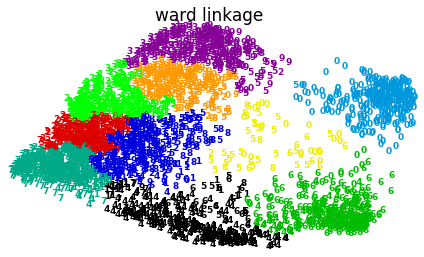

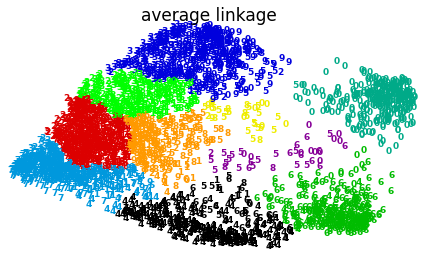

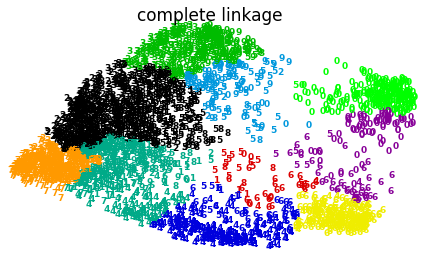

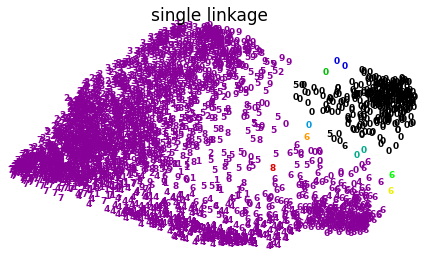

In [5]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

plt.show()